This is just a fun little sandbox for me to matplotlibbify a graph I used to doodle in classes as a kid.

Unfortunately, the graph looks a lot nicer here than it will on LinkedIn, which lowers the resolution.

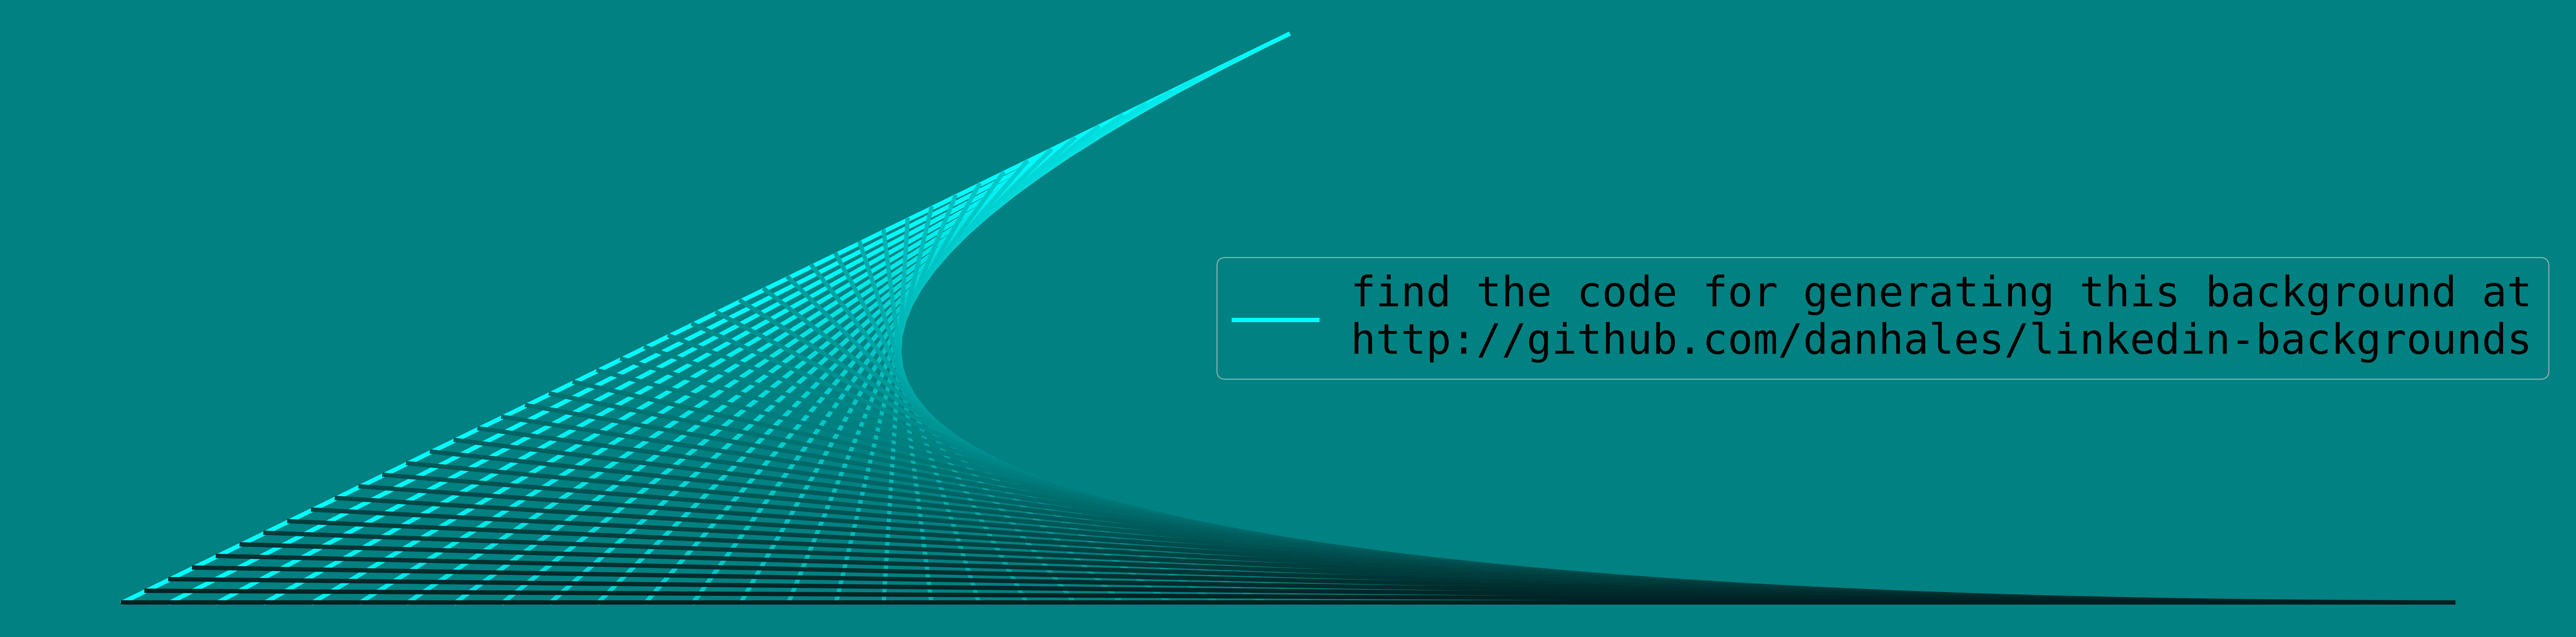

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Monospace')

def get_lines(n=10, h=396, w=1584):
    """
    Creates the set of endpoints for each line in the graph.
    The lines start on the upper line and end on the lower line.
    The endpoints move DOWN the upper line and to the RIGHT on the lower line.
    When plotting, we iterate over the lines in this list.
    
    Parameters
    ----------
    n (int):
        The number of lines we want in the graph.
        Default: 10
    h (float):
        The height of the graph (supposedly the default for LinkedIn)
    w (float):
        The width of the graph (supposedly the default for LinkedIn)
    
    Returns
    -------
    A list of tuples of endpoints.
    """
    m = n-1
    return [((2 * h * (1-i/m),  h * (1-i/m)), (w * i/m, 0)) for i in range(n)]

def get_color_gradient(n=10, rgb1 = (0, 0, 0), rgb2=(1, 1, 1)):
    """
    Creates a color gradient that smoothly transitions from rgb1 to rgb2.
    
    Parameters
    ----------
    n (int):
        The number of colors in the gradient. 
        Should match the number of lines you want.
        Default: 10
    rgb1 (tuple of floats):
        A tuple representing the color as a tuple of floats in [0,1] of RGB/RGBA values.
        This is the starting color, which is concentrated at the upper point of the graph.
        Default: (0,0,0) (black)
    rgb1 (tuple of floats):
        A tuple representing the color as a tuple of floats in [0,1] of RGB/RGBA values.
        This is the ending color, which is concentrated at the lower point of the graph.
        Default: (1,1,1) (white)
    
    Returns
    -------
    A list of tuples of RGB values, evenly-spaced to transition from rgb1 to rgb2 in n steps.
    """
    step_sizes = [(color2 - color1)/n for color1, color2 in zip(rgb1, rgb2)]
    return [[col + i * step for col, step in zip(rgb1, step_sizes)] for i in list(range(n))]

n = 50 # we want 50 lines
h= 396 # the height (in pixels) of linkedin's background image
w = 1584 # the height (in pixels) of linkedin's background image
dpi=300 # pixels per inch (used to scale the image dimensions for higher resolution)

def make_background(n=50, start_color=(0,0,0), end_color=(1,1,1), facecolor=(.5, .5, .5)):
    """
    A nice little function that generates the neat angled mesh grid background image.
    
    Parameters
    ----------
    n (int):
        The number of lines we want in the mesh grid.
    start_color (tuple of floats):
        RGB/RGBA values for the color in the upper peak.
    end_color (tuple of floats):
        RGB/RGBA values for the color in the lower peak.
    face_color (tuple of floats):
        RGB/RGBA values for the background color
    """
    lines = get_lines(n)
    colors = get_color_gradient(n, start_color, end_color)

    # make the figure with the right size
    dpi = 300
    plt.figure(figsize=(10 * w/dpi, 10 * h/dpi), 
               facecolor=facecolor,
               dpi=dpi)
    
    # turn off the axis. we just want the cool mesh grid!
    plt.axis("off")
    
    #
    for line, color in zip(lines, colors):
        plt.plot([p[0] for p in line], [p[1] for p in line], lw=5, c=color)
    
    plt.legend(['find the code for generating this background at\nhttp://github.com/danhales/linkedin-backgrounds'],
               fontsize=48,
               facecolor=(0, 0.5, 0.5), 
               loc=5)
    
    plt.savefig('images/sep-29-20.png')
    plt.show()

# And now we can make our background!
make_background(n=50, 
                start_color=(0,1,1), 
                end_color=(0, 0.1, 0.1), 
                facecolor=(0, 0.5, 0.5))